In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [4]:
df.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

In [5]:
Input = df.iloc[:,:-1]
Output = df.iloc[:, -1]

In [6]:
X = Input.to_numpy()
y = Output.to_numpy()

In [7]:
type(Input), type(X), type(Output), type(y)

(pandas.core.frame.DataFrame,
 numpy.ndarray,
 pandas.core.series.Series,
 numpy.ndarray)

In [8]:
rl = LinearRegression()
rl.fit(X,y)

LinearRegression()

In [9]:
print('기울기: ',rl.coef_)
print('절편:', rl.intercept_)

기울기:  [ 6.92224640e-04  9.31168327e-03  3.80986521e+00 -1.08011358e-01
 -1.47556685e+00  2.05586264e-02 -5.24758378e-01 -1.77666112e+01
 -9.52747232e-01  3.06049479e-01  4.64204584e-02 -1.23345939e-02
  2.68673382e+00]
절편: 36.45948838508971


In [10]:
y_hat = rl.predict(Input)

print('R^2: ', rl.score(X, y))
print('MSE: ', mean_squared_error(y,y_hat))

R^2:  0.7406426641094094
MSE:  21.894831181729206


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 1004)

In [12]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


In [14]:
rl.fit(X_train, y_train)
y_train_hat = rl.predict(X_train)

print('R^2: ', rl.score(X_train, y_train))
print('MSE: ', mean_squared_error(y_train, y_train_hat))

y_test_hat = rl.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_test_hat))

R^2:  0.7282123460763663
MSE:  22.928871857314128
MSE:  19.450267341373557


In [15]:
df.corr()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


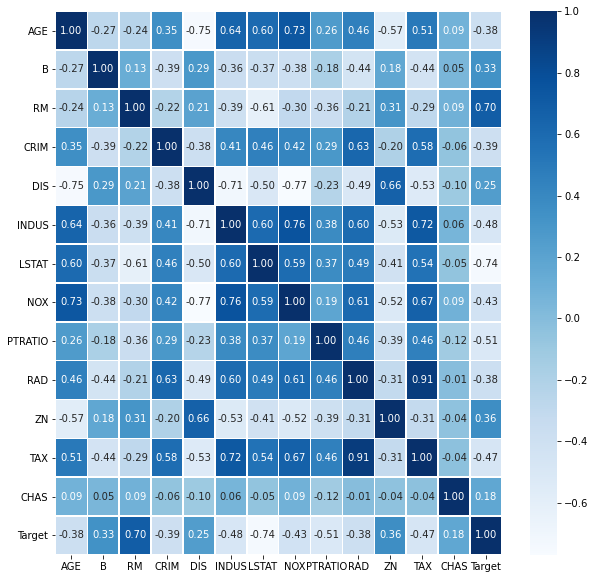

In [16]:
plt.figure(figsize=(10, 10))

sns.heatmap(data = df.corr(), annot = True,
           fmt = '.2f', linewidths=.5, cmap='Blues')

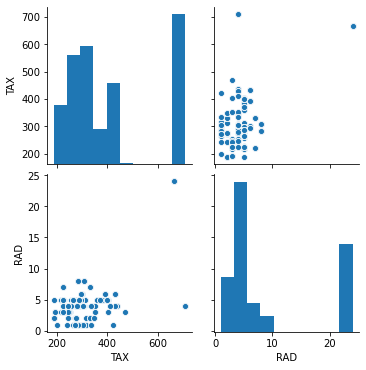

In [17]:
sns.pairplot(df[['TAX','RAD']])

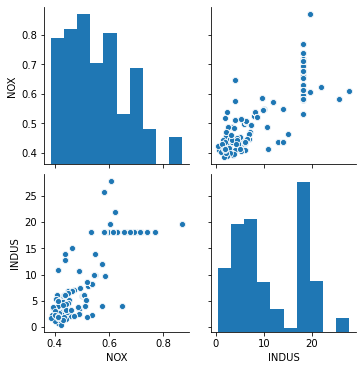

In [18]:
sns.pairplot(df[['NOX','INDUS']])

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['features'] = Input.columns
vif

,VIF Factor,features
0,21.386850,AGE
1,20.104943,B
2,77.948283,RM
3,2.100373,CRIM
4,14.699652,DIS
5,14.485758,INDUS
6,11.102025,LSTAT
7,73.894947,NOX
8,85.029547,PTRATIO
9,15.167725,RAD


In [22]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 36 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [24]:
fs = SFS(LinearRegression(),
           k_features=5, forward=True, floating=False, scoring = 'r2', cv = 0)

fs.fit(Input,Output)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=5,
                          scoring='r2')

In [25]:
fs.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.5441463]),
  'avg_score': 0.5441462975864799,
  'feature_names': ('LSTAT',)},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.63856161]),
  'avg_score': 0.6385616062603403,
  'feature_names': ('RM', 'LSTAT')},
 3: {'feature_idx': (2, 6, 8),
  'cv_scores': array([0.67862416]),
  'avg_score': 0.6786241601613111,
  'feature_names': ('RM', 'LSTAT', 'PTRATIO')},
 4: {'feature_idx': (2, 4, 6, 8),
  'cv_scores': array([0.6903077]),
  'avg_score': 0.6903077016842538,
  'feature_names': ('RM', 'DIS', 'LSTAT', 'PTRATIO')},
 5: {'feature_idx': (2, 4, 6, 7, 8),
  'cv_scores': array([0.70808929]),
  'avg_score': 0.7080892893529662,
  'feature_names': ('RM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO')}}

In [26]:
pd.DataFrame.from_dict(fs.get_metric_dict()).T

/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)",[0.5441462975864799],0.544146,"(LSTAT,)",NaN,0,NaN
2,"(2, 6)",[0.6385616062603403],0.638562,"(RM, LSTAT)",NaN,0,NaN
3,"(2, 6, 8)",[0.6786241601613111],0.678624,"(RM, LSTAT, PTRATIO)",NaN,0,NaN
4,"(2, 4, 6, 8)",[0.6903077016842538],0.690308,"(RM, DIS, LSTAT, PTRATIO)",NaN,0,NaN
5,"(2, 4, 6, 7, 8)",[0.7080892893529662],0.708089,"(RM, DIS, LSTAT, NOX, PTRATIO)",NaN,0,NaN


In [27]:
print('전진선택법시 R^2: ', fs.k_score_)
print('전진선택법시 Feature Index: ', fs.k_feature_idx_)

전진선택법시 R^2:  0.7080892893529662
전진선택법시 Feature Index:  (2, 4, 6, 7, 8)


In [28]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/pirl/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


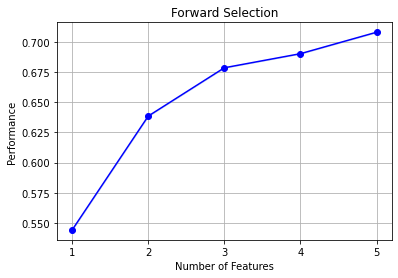

In [29]:
fig = plot_sfs(fs.get_metric_dict())
plt.title('Forward Selection')
plt.grid()
plt.show()
